In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm

In [68]:
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()

In [78]:
#creating a housing Dataframe
housing_df=pd.DataFrame(data=housing.data,columns=housing.feature_names)

In [82]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [84]:
housing_df['HousePrice']=housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [88]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

In [90]:
housing_df.shape

(20640, 9)

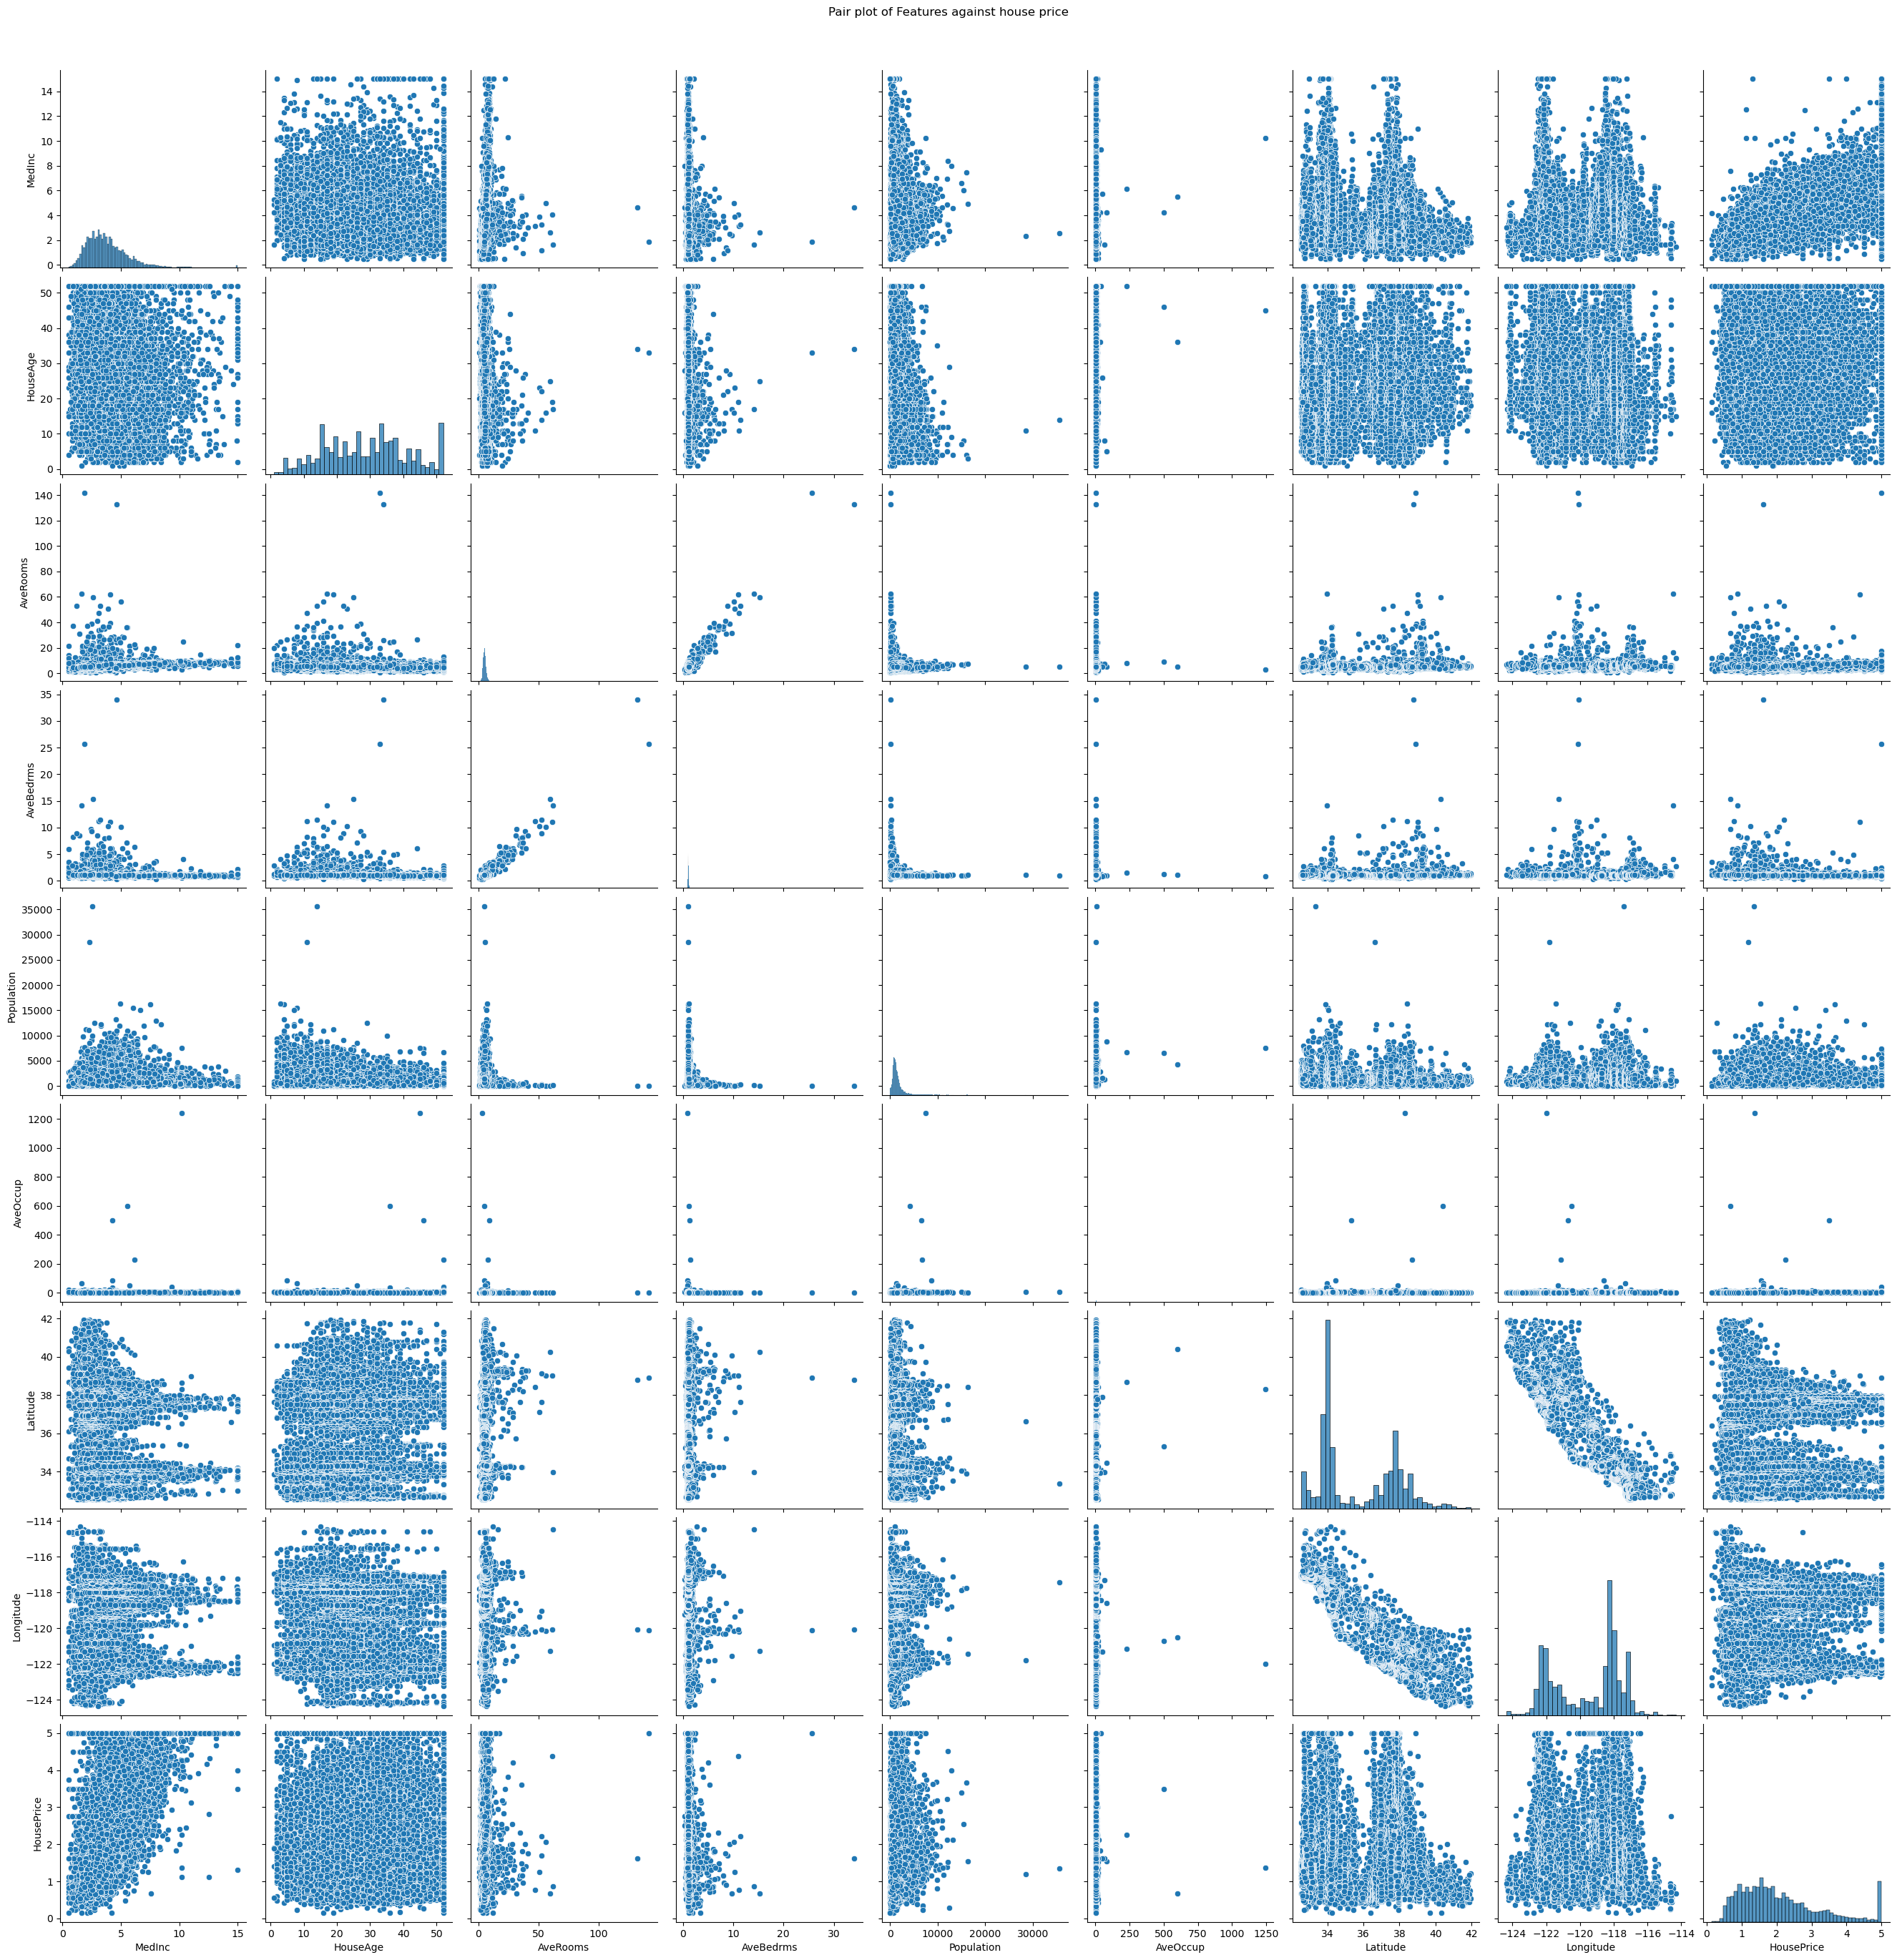

In [92]:
sns.pairplot(data=housing_df,height=3)
plt.suptitle('Pair plot of Features against house price', y= 1.02)
plt.show()

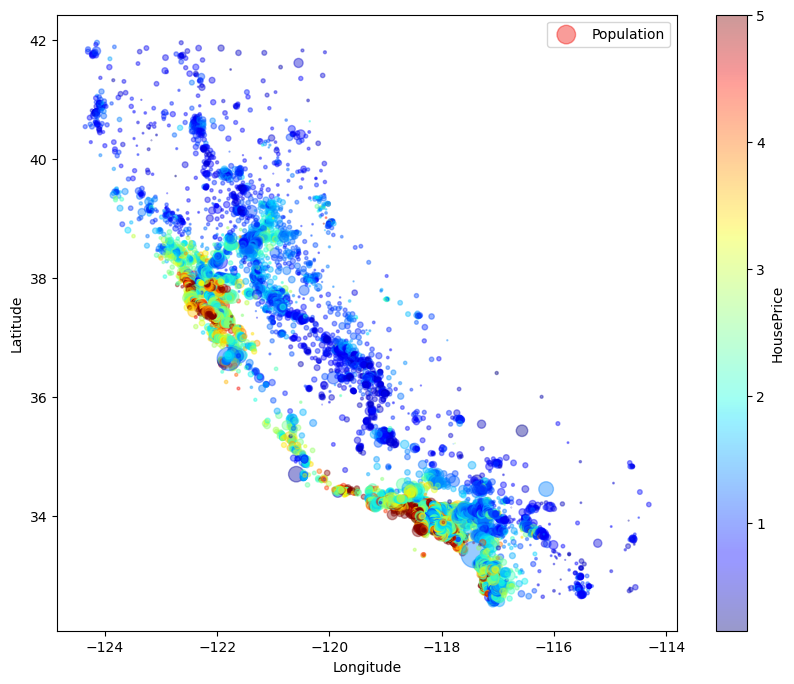

In [94]:
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y= 'Latitude',
    alpha= 0.4,
    s=housing_df['Population']/100,
    label='Population',
     c='HousePrice',
      cmap='jet',
    colorbar=True,
    figsize=(10,8)
    
)
plt.show()

<Axes: >

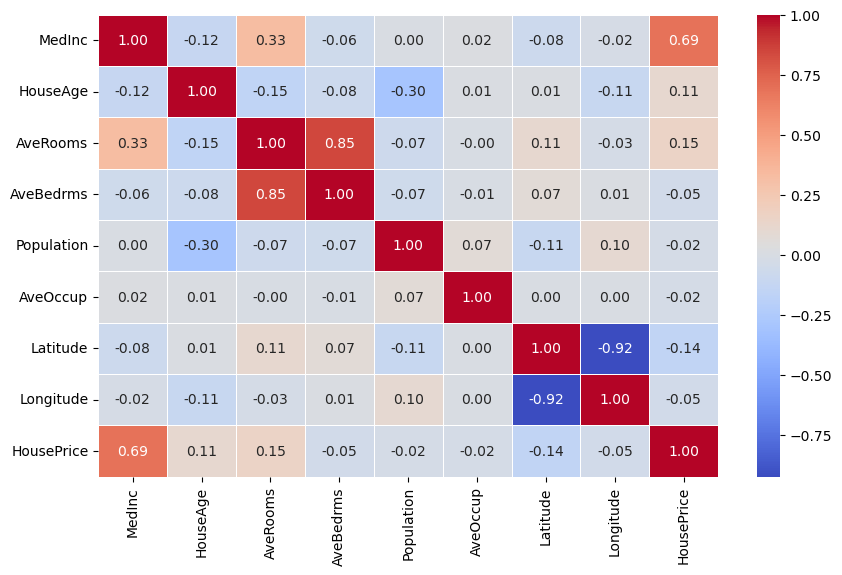

In [96]:
corr= housing_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,fmt='.2f',linewidth=0.5,cmap='coolwarm')

In [98]:
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

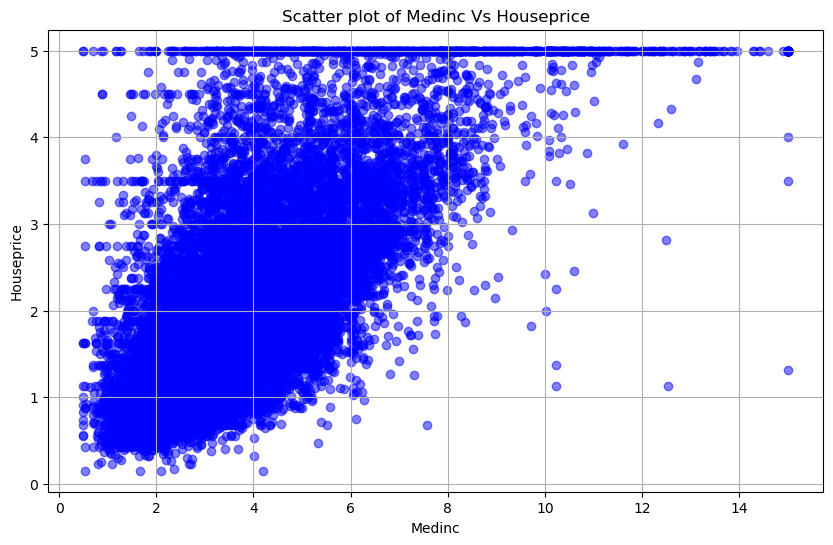

In [100]:
 medinc= housing_df['MedInc']
houseprice= housing_df['HousePrice']
plt.figure(figsize=(10,6))
plt.scatter(medinc,houseprice,alpha=0.5,color='blue')
plt.title('Scatter plot of Medinc Vs Houseprice')
plt.xlabel('Medinc')
plt.ylabel('Houseprice')
plt.grid(True)
plt.show()

In [102]:
#calculate the variance inflation factor to identify multicollinearity,it helps to determine the predictors and drop values with high vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor
housing_df_vif = housing_df.drop('HousePrice',axis=1)
housing_df_vif= housing_df_vif.apply(pd.to_numeric,errors='coerce')

vif_data= pd.DataFrame()
vif_data['Feature']= housing_df_vif.columns
vif_data['VIF']=[variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [104]:
#eliminate latitude and longitude to  avoid multicolinearitx issues
housing_df=housing_df.drop(['Longitude','Latitude'],axis=1)

In [106]:
#convert columns to numeric
cols_to_convert =['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert]= housing_df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
housing_df['HousePrice']=pd.to_numeric(housing_df['HousePrice'],errors='coerce')

X= sm.add_constant(housing_df.drop('HousePrice',axis=1))
y= housing_df['HousePrice']

model=sm.OLS(y,X).fit()

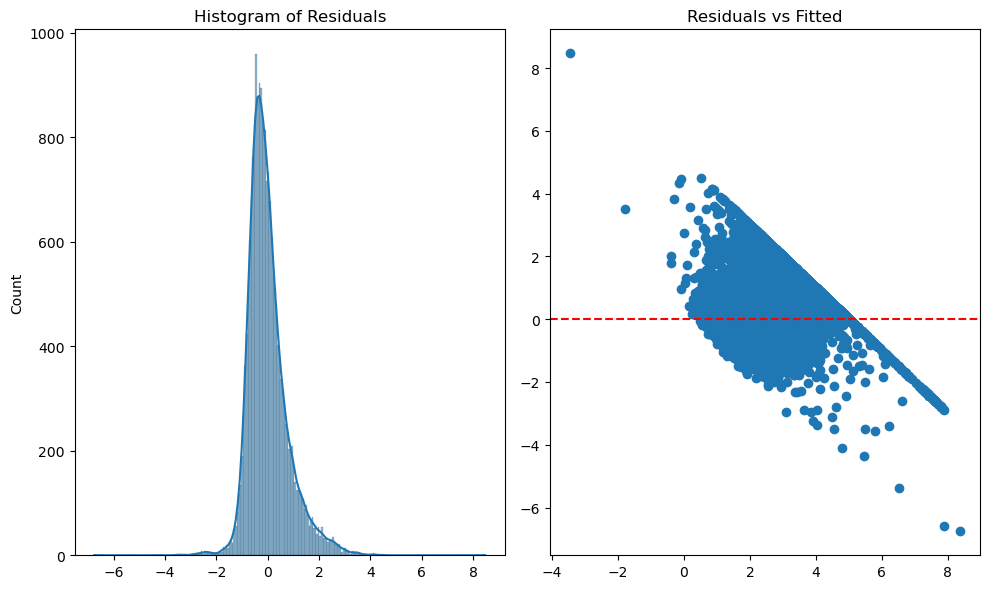

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [110]:

residuals = model.resid  # assuming model has been fit and has a resid attribute

# Create the figure
plt.figure(figsize=(10,6))

# Plot 1: Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")

# Plot 2: Residuals vs Fitted values
plt.subplot(1, 2, 2)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted")

# Show the plots
plt.tight_layout()
plt.show()

print("Model coefficients:\n",model.params)


In [118]:
from sklearn.metrics import mean_squared_error,r2_score

predictions = model.predict(X)

print('R square score :', r2_score(y,predictions))
print('MSE:', mean_squared_error(y,predictions))

R square score : 0.5396977345638283
MSE: 0.6129156196698702


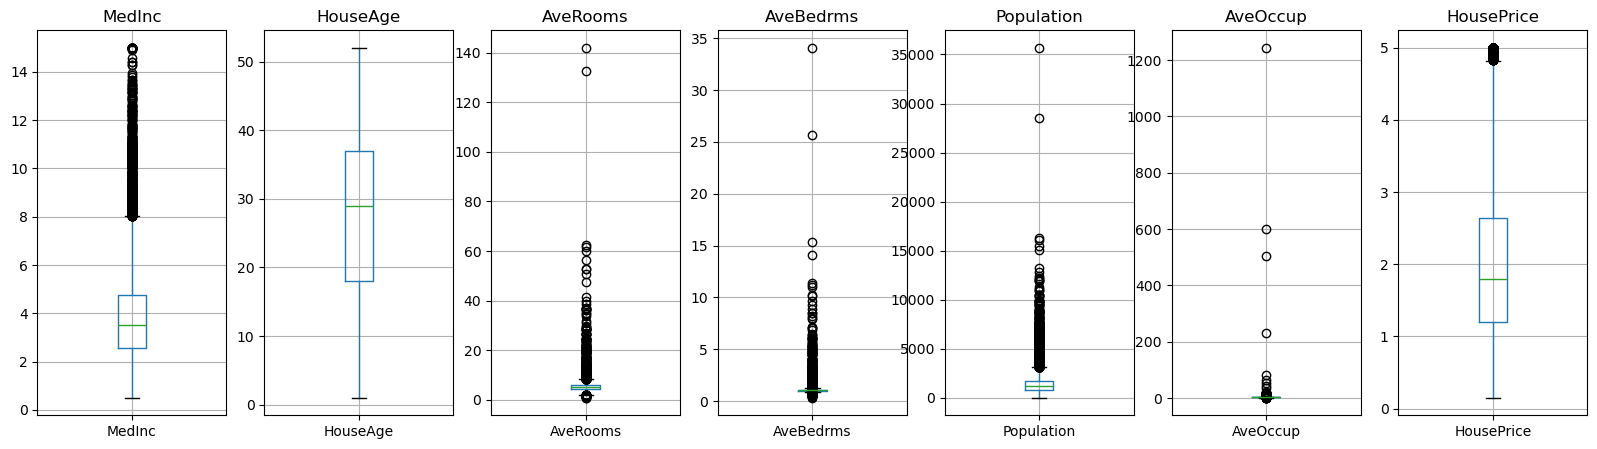

In [120]:
def plot_boxplots(df):
    fig,axes = plt.subplots(1,len(df.columns),figsize=(20,5))
    for i,column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax=axes[i])
        axes[i].set_title(column_name)
    plt.show()

plot_boxplots(housing_df)

In [146]:
def remove_outliers(df):
    df_no_outliers= df.copy()
    
    for column_name in df.columns:
        Q1= df[column_name].quantile(0.25)
        Q3= df[column_name].quantile(0.75)
        
        IQR= Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound= Q3 + 1.5 * IQR
        
        df_no_outliers[column_name]=df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return df_no_outliers
housing_df_new = remove_outliers(housing_df)    





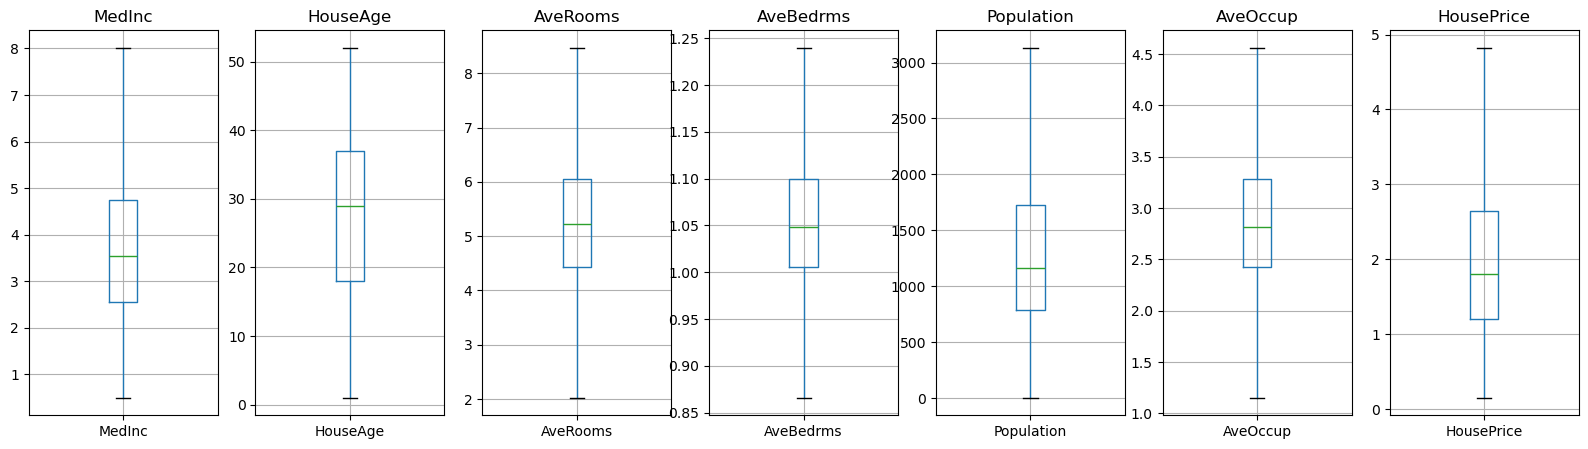

In [148]:
plot_boxplots(housing_df_new)

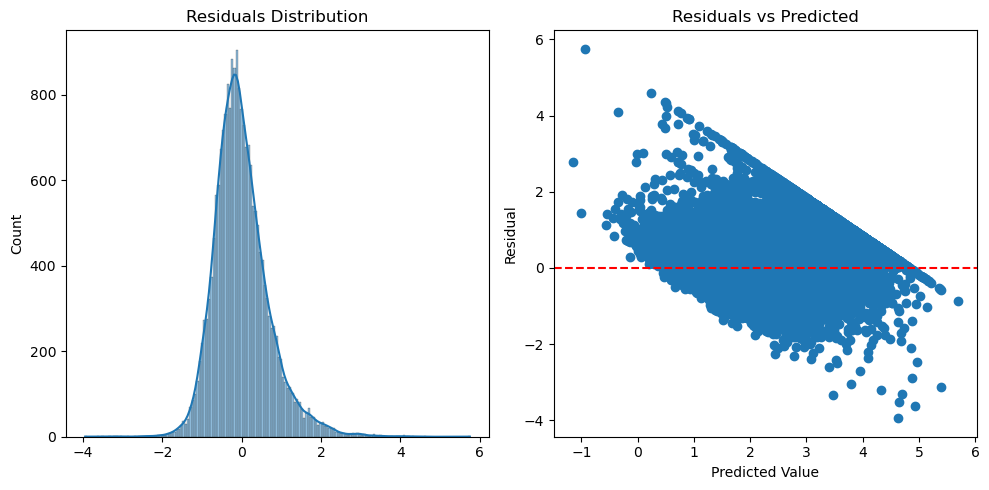

Model coefficients:
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [154]:
# Use the new cleaned DataFrame 'housing_df_new' instead of 'housing_df'
X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

# Fit the model on the new data
model = sm.OLS(y, X).fit()

# Get the residuals
residuals_2 = model.resid

# Create the figure
plt.figure(figsize=(10, 5))

# Plot 1: Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_2, kde=True)
plt.title("Residuals Distribution")

# Plot 2: Residuals vs Fitted values
plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals_2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# Show the plots
plt.tight_layout()
plt.show()

# Display the updated model coefficients
print("Model coefficients:\n", model.params)


In [156]:
from sklearn.metrics import mean_squared_error,r2_score

predictions = model.predict(X)

print('R square score :', r2_score(y,predictions))
print('MSE:', mean_squared_error(y,predictions))

R square score : 0.617696810976802
MSE: 0.4900189223577003
